<a href="https://colab.research.google.com/github/Arko06/Case-Study--Transfers-of-Value-Analysis/blob/main/Case_Study_Transfers_of_Value_Analysis_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Case_Study_Data_set_for_ToV_Analysis.xlsx to Case_Study_Data_set_for_ToV_Analysis.xlsx


In [6]:
#Read the Data
import io

Case_study_data = pd.read_excel(io.BytesIO(uploaded['Case_Study_Data_set_for_ToV_Analysis.xlsx']))
print(Case_study_data)

      Company   Spend ID  YEAR  Country  Spend_Amount(ToV) in USD  \
0         ABC  469814266  2023  Austria                   2520.00   
1         ABC  500349066  2022  Austria                    250.00   
2         ABC  500842000  2022  Austria                    250.00   
3         ABC  433290800  2022  Austria                    612.70   
4         ABC  452077900  2023  Austria                   1000.00   
...       ...        ...   ...      ...                       ...   
35225     ABC  484769466  2023  Croatia                    215.67   
35226     ABC  484771000  2023  Croatia                      4.98   
35227     ABC  452890166  2022  Croatia                    512.84   
35228     ABC  452890966  2022  Croatia                    663.61   
35229     ABC  452891300  2022  Croatia                    663.61   

      Cross Border_Flag  Customer ID  HCP_Name HCO_Name POrg_Name Category  \
0                     N  26735685168       NaN      NaN   POrg_19   PT_GRP   
1              

In [7]:
Case_study_data.head(10)

,Company,Spend ID,YEAR,Country,Spend_Amount(ToV) in USD,Cross Border_Flag,Customer ID,HCP_Name,HCO_Name,POrg_Name,Category,Spend Category,Payment Type,Unnamed: 13,Unnamed: 14
0,ABC,469814266,2023,Austria,2520.00,N,26735685168,NaN,NaN,POrg_19,PT_GRP,Patient Org,Patient Org,NaN,NaN
1,ABC,500349066,2022,Austria,250.00,N,26660910024,NaN,HCO_276,NaN,HCO,Registration Fees,General Payment,NaN,NaN
2,ABC,500842000,2022,Austria,250.00,N,2745545328,NaN,HCO_903,NaN,HCO,Registration Fees,General Payment,NaN,NaN
3,ABC,433290800,2022,Austria,612.70,N,2745545328,NaN,HCO_903,NaN,HCO,R&D,Research & Development,NaN,NaN
4,ABC,452077900,2023,Austria,1000.00,N,2745545328,NaN,HCO_903,NaN,HCO,R&D,Research & Development,NaN,NaN
5,ABC,428637166,2022,Austria,157.40,N,2745545328,NaN,HCO_903,NaN,HCO,R&D,Research & Development,NaN,NaN
6,ABC,445749866,2023,Austria,113.16,N,2740992912,NaN,HCO_952,NaN,HCO,R&D,Research & Development,NaN,NaN
7,ABC,444756366,2023,Austria,-600.00,N,2740992912,NaN,HCO_952,NaN,HCO,R&D,Research & Development,NaN,NaN
8,ABC,495031066,2023,Austria,10000.00,Y,26661185664,NaN,HCO_248,NaN,HCO,Sponsorships,General Payment,NaN,NaN
9,ABC,500348533,2023,Austria,710.99,N,26660909088,NaN,HCO_286,NaN,HCO,Registration Fees,General Payment,NaN,NaN


In [8]:
#Check for null values
Case_study_data.isnull().sum()

,0
Company,0
Spend ID,0
YEAR,0
Country,0
Spend_Amount(ToV) in USD,0
Cross Border_Flag,0
Customer ID,0
HCP_Name,19054
HCO_Name,16650
POrg_Name,34756


In [9]:
#Check row and column count
Case_study_data.shape

(35230, 15)

In [10]:
#Delete irrelevant columns with null values
Case_study_data.drop('Unnamed: 14', axis = 'columns', inplace = True)
Case_study_data.drop('Unnamed: 13', axis = 'columns', inplace = True)


In [11]:
Case_study_data.head(10)

,Company,Spend ID,YEAR,Country,Spend_Amount(ToV) in USD,Cross Border_Flag,Customer ID,HCP_Name,HCO_Name,POrg_Name,Category,Spend Category,Payment Type
0,ABC,469814266,2023,Austria,2520.00,N,26735685168,NaN,NaN,POrg_19,PT_GRP,Patient Org,Patient Org
1,ABC,500349066,2022,Austria,250.00,N,26660910024,NaN,HCO_276,NaN,HCO,Registration Fees,General Payment
2,ABC,500842000,2022,Austria,250.00,N,2745545328,NaN,HCO_903,NaN,HCO,Registration Fees,General Payment
3,ABC,433290800,2022,Austria,612.70,N,2745545328,NaN,HCO_903,NaN,HCO,R&D,Research & Development
4,ABC,452077900,2023,Austria,1000.00,N,2745545328,NaN,HCO_903,NaN,HCO,R&D,Research & Development
5,ABC,428637166,2022,Austria,157.40,N,2745545328,NaN,HCO_903,NaN,HCO,R&D,Research & Development
6,ABC,445749866,2023,Austria,113.16,N,2740992912,NaN,HCO_952,NaN,HCO,R&D,Research & Development
7,ABC,444756366,2023,Austria,-600.00,N,2740992912,NaN,HCO_952,NaN,HCO,R&D,Research & Development
8,ABC,495031066,2023,Austria,10000.00,Y,26661185664,NaN,HCO_248,NaN,HCO,Sponsorships,General Payment
9,ABC,500348533,2023,Austria,710.99,N,26660909088,NaN,HCO_286,NaN,HCO,Registration Fees,General Payment


In [12]:
Case_study_data.isnull().sum()

,0
Company,0
Spend ID,0
YEAR,0
Country,0
Spend_Amount(ToV) in USD,0
Cross Border_Flag,0
Customer ID,0
HCP_Name,19054
HCO_Name,16650
POrg_Name,34756


In [13]:
Case_study_data.drop('POrg_Name', axis = 'columns', inplace = True)

In [14]:
Case_study_data.head()

,Company,Spend ID,YEAR,Country,Spend_Amount(ToV) in USD,Cross Border_Flag,Customer ID,HCP_Name,HCO_Name,Category,Spend Category,Payment Type
0,ABC,469814266,2023,Austria,2520.0,N,26735685168,NaN,NaN,PT_GRP,Patient Org,Patient Org
1,ABC,500349066,2022,Austria,250.0,N,26660910024,NaN,HCO_276,HCO,Registration Fees,General Payment
2,ABC,500842000,2022,Austria,250.0,N,2745545328,NaN,HCO_903,HCO,Registration Fees,General Payment
3,ABC,433290800,2022,Austria,612.7,N,2745545328,NaN,HCO_903,HCO,R&D,Research & Development
4,ABC,452077900,2023,Austria,1000.0,N,2745545328,NaN,HCO_903,HCO,R&D,Research & Development


In [15]:
Case_study_data.isnull().sum()

,0
Company,0
Spend ID,0
YEAR,0
Country,0
Spend_Amount(ToV) in USD,0
Cross Border_Flag,0
Customer ID,0
HCP_Name,19054
HCO_Name,16650
Category,0


In [16]:
Case_study_data

,Company,Spend ID,YEAR,Country,Spend_Amount(ToV) in USD,Cross Border_Flag,Customer ID,HCP_Name,HCO_Name,Category,Spend Category,Payment Type
0,ABC,469814266,2023,Austria,2520.00,N,26735685168,NaN,NaN,PT_GRP,Patient Org,Patient Org
1,ABC,500349066,2022,Austria,250.00,N,26660910024,NaN,HCO_276,HCO,Registration Fees,General Payment
2,ABC,500842000,2022,Austria,250.00,N,2745545328,NaN,HCO_903,HCO,Registration Fees,General Payment
3,ABC,433290800,2022,Austria,612.70,N,2745545328,NaN,HCO_903,HCO,R&D,Research & Development
4,ABC,452077900,2023,Austria,1000.00,N,2745545328,NaN,HCO_903,HCO,R&D,Research & Development
...,...,...,...,...,...,...,...,...,...,...,...,...
35225,ABC,484769466,2023,Croatia,215.67,N,26737460208,HCP_5820,NaN,HCP,Registration Fees,General Payment
35226,ABC,484771000,2023,Croatia,4.98,N,2747952648,HCP_2049,NaN,HCP,Travel & Accommodation,General Payment
35227,ABC,452890166,2022,Croatia,512.84,N,2747841360,HCP_1929,NaN,HCP,Fees,General Payment
35228,ABC,452890966,2022,Croatia,663.61,N,2747681616,HCP_1788,NaN,HCP,Fees,General Payment


In [17]:
Case_study_data.isnull().sum()

,0
Company,0
Spend ID,0
YEAR,0
Country,0
Spend_Amount(ToV) in USD,0
Cross Border_Flag,0
Customer ID,0
HCP_Name,19054
HCO_Name,16650
Category,0


In [18]:
#Replacing Null values with Unknown
Case_study_data['HCP_Name'].fillna('Unknown', inplace = True)
Case_study_data['HCO_Name'].fillna('Unknown', inplace = True)

In [19]:
Case_study_data.isnull().sum()

,0
Company,0
Spend ID,0
YEAR,0
Country,0
Spend_Amount(ToV) in USD,0
Cross Border_Flag,0
Customer ID,0
HCP_Name,0
HCO_Name,0
Category,0


In [20]:
Case_study_data.shape

(35230, 12)

In [21]:
Case_study_data.head()

,Company,Spend ID,YEAR,Country,Spend_Amount(ToV) in USD,Cross Border_Flag,Customer ID,HCP_Name,HCO_Name,Category,Spend Category,Payment Type
0,ABC,469814266,2023,Austria,2520.0,N,26735685168,Unknown,Unknown,PT_GRP,Patient Org,Patient Org
1,ABC,500349066,2022,Austria,250.0,N,26660910024,Unknown,HCO_276,HCO,Registration Fees,General Payment
2,ABC,500842000,2022,Austria,250.0,N,2745545328,Unknown,HCO_903,HCO,Registration Fees,General Payment
3,ABC,433290800,2022,Austria,612.7,N,2745545328,Unknown,HCO_903,HCO,R&D,Research & Development
4,ABC,452077900,2023,Austria,1000.0,N,2745545328,Unknown,HCO_903,HCO,R&D,Research & Development


##Q1: What is the Total Transfers of values in scope of 2023 disclosure and what is the YoY%?##


In [151]:
# Filter the dataframe for the year 2023
Case_study_data_2023 = Case_study_data[Case_study_data.YEAR == 2023]

# Calculate the total Spend_Amount(ToV) in USD for 2023
total_spend_amount_tov_2023 = Case_study_data_2023['Spend_Amount(ToV) in USD'].sum()

# Print the total spend
print(f"The total spend amount(TOV) for the scope of 2023 is: ${total_spend_amount_tov_2023:.2f}")

# Group by year and calculate the total spend amount for each year
year_spend = Case_study_data.groupby('YEAR')['Spend_Amount(ToV) in USD'].sum()

# Calculate the year-on-year growth rate
year_on_year_growth = year_spend.pct_change() * 100

# Print the year-on-year growth rate
print("Year-on-Year Growth Rate for Spend_Amount(ToV) in %:")
print(year_on_year_growth.drop(2022).round(2))

The total spend amount(TOV) for the scope of 2023 is: $1932651.42
Year-on-Year Growth Rate for Spend_Amount(ToV) in %:
YEAR
2023    12.67
Name: Spend_Amount(ToV) in USD, dtype: float64


##Q2: Distribution of ToV across the spend category and which is the highest paid spend category?##

In [26]:
#Distribution of ToV across different category
Distribution_of_TOV = Case_study_data.groupby('Category')['Spend_Amount(ToV) in USD'].sum().astype(int)

# Convert the amounts to thousands
Distribution_of_TOV = Distribution_of_TOV / 1000

#Print the Distribution of ToV across the spend category
print("Distribution of ToV across the spend category:")
print(Distribution_of_TOV)

#Print the highest category based on ToV
print(Distribution_of_TOV[Distribution_of_TOV == Distribution_of_TOV.max()])

Distribution of ToV across the spend category:
Category
HCO       1972.238
HCP       1606.402
PT_GRP      69.350
Name: Spend_Amount(ToV) in USD, dtype: float64
Category
HCO    1972.238
Name: Spend_Amount(ToV) in USD, dtype: float64


In [31]:
Distribution_of_TOV_df = pd.DataFrame(Distribution_of_TOV)
Distribution_of_TOV_df

,Spend_Amount(ToV) in USD
Category,
HCO,1972.238
HCP,1606.402
PT_GRP,69.350


<ipython-input-34-1be0ca77ae89>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=Distribution_of_TOV_df, x='Category', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)
<ipython-input-34-1be0ca77ae89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=Distribution_of_TOV_df, x='Category', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)


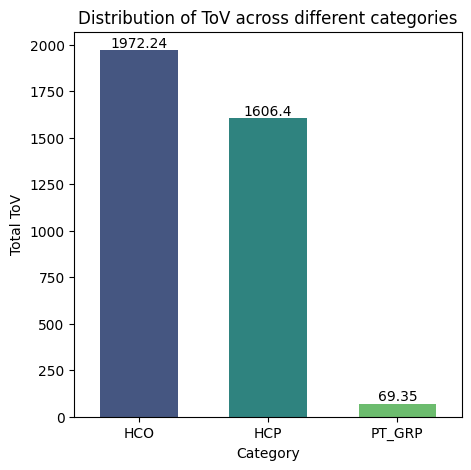

In [34]:
#Create a bar plot
plt.figure(figsize=(5, 5))
barplot = sns.barplot(data=Distribution_of_TOV_df, x='Category', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)

plt.xlabel("Category")
plt.ylabel("Total ToV")
plt.title("Distribution of ToV across different categories")
for bars in barplot.containers: barplot.bar_label(bars)
plt.show()


##Q3(Part1): Who are the top 10 HCPs & HCOs for the year 2023?##

In [37]:
#Top 10 HCPs & HCOs for the year 2023
Top10_HCPs_2023 = Case_study_data[Case_study_data.YEAR == 2023].groupby('HCP_Name')['Spend_Amount(ToV) in USD'].sum().nlargest(11).astype(int).drop('Unknown')
Top10_HCOs_2023 = Case_study_data[Case_study_data.YEAR == 2023].groupby('HCO_Name')['Spend_Amount(ToV) in USD'].sum().nlargest(11).astype(int).drop('Unknown')

In [40]:
#Print the top 10 HCPs & HCOs for the year 2023
print(Top10_HCPs_2023)
print(Top10_HCOs_2023)

HCP_Name
HCP_740     19940
HCP_1258    18005
HCP_1005    14328
HCP_348     10438
HCP_726     10012
HCP_1907    10006
HCP_1859     9147
HCP_3233     6982
HCP_1772     6303
HCP_2059     5290
Name: Spend_Amount(ToV) in USD, dtype: int64
HCO_Name
HCO_841     159500
HCO_806      58928
HCO_737      44520
HCO_820      41196
HCO_336      34145
HCO_1035     28239
HCO_948      27600
HCO_918      26573
HCO_537      26544
HCO_444      26544
Name: Spend_Amount(ToV) in USD, dtype: int64


In [48]:
Top10_HCPs_2023_df = pd.DataFrame(Top10_HCPs_2023)
Top10_HCOs_2023_df = pd.DataFrame(Top10_HCOs_2023)


<ipython-input-45-01c78da7671c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=Top10_HCPs_2023_df, x='HCP_Name', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)
<ipython-input-45-01c78da7671c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=Top10_HCPs_2023_df, x='HCP_Name', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)


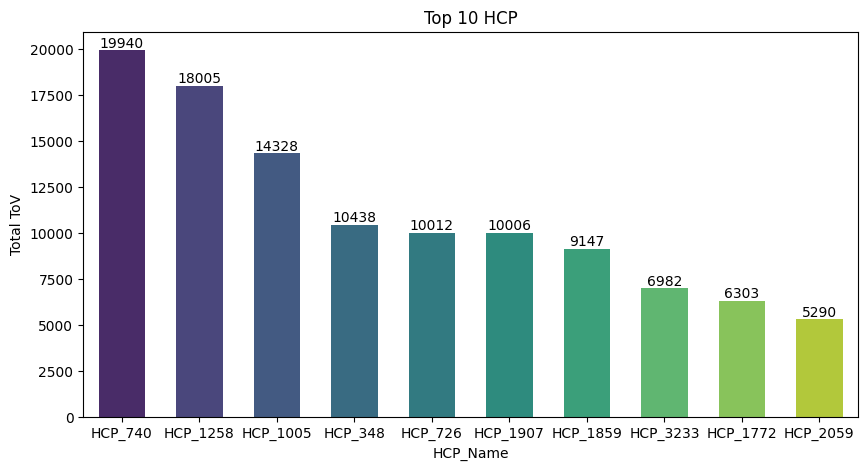

<ipython-input-45-01c78da7671c>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=Top10_HCOs_2023_df, x='HCO_Name', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)
<ipython-input-45-01c78da7671c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=Top10_HCOs_2023_df, x='HCO_Name', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)


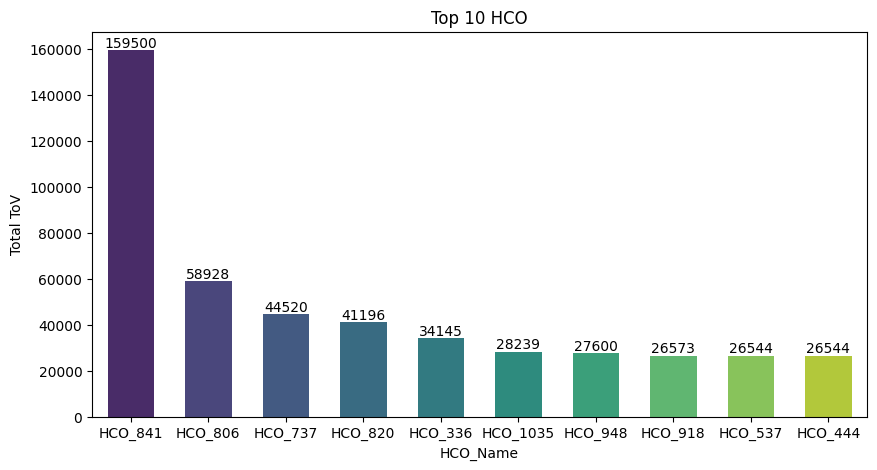

In [45]:
#Create a bar plot
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=Top10_HCPs_2023_df, x='HCP_Name', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)

plt.xlabel("HCP_Name")
plt.ylabel("Total ToV")
plt.title("Top 10 HCP")
for bars in barplot.containers: barplot.bar_label(bars)
plt.show()

plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=Top10_HCOs_2023_df, x='HCO_Name', y='Spend_Amount(ToV) in USD', ci=None, estimator=sum, palette='viridis', width=0.6)

plt.xlabel("HCO_Name")
plt.ylabel("Total ToV")
plt.title("Top 10 HCO")
for bars in barplot.containers: barplot.bar_label(bars)
plt.show()

##Q3(Part2): They are from which country?##

In [154]:
#Top 10 HCPs & HCOs for the year 2023 and their countries.
Top10_HCPs_2023_country = Case_study_data[(Case_study_data.YEAR == 2023) & (Case_study_data.HCP_Name != 'Unknown')].groupby(['HCP_Name','Country'])['Spend_Amount(ToV) in USD'].sum().sort_values(ascending=False).head(10).astype(int)
Top10_HCOs_2023_country = Case_study_data[(Case_study_data.YEAR == 2023) & (Case_study_data.HCO_Name != 'Unknown')].groupby(['HCO_Name','Country'])['Spend_Amount(ToV) in USD'].sum().sort_values(ascending=False).head(10).astype(int)

In [155]:
#Print the top 10 HCPs & HCOs for the year 2023 and their countries.
print(Top10_HCPs_2023_country)
print(Top10_HCOs_2023_country)

HCP_Name  Country       
HCP_740   Czech Republic    19940
HCP_1258  Czech Republic    18005
HCP_1005  Czech Republic    14328
HCP_348   Czech Republic    10438
HCP_726   Czech Republic    10012
HCP_1907  Croatia           10006
HCP_1859  Croatia            9147
HCP_3233  Bulgaria           6982
HCP_1772  Croatia            6303
HCP_2059  Croatia            5290
Name: Spend_Amount(ToV) in USD, dtype: int64
HCO_Name  Country       
HCO_841   Croatia           159500
HCO_806   Croatia            58928
HCO_737   Croatia            44520
HCO_820   Belgium            41196
HCO_336   Bulgaria           34145
HCO_1035  Austria            28239
HCO_948   Czech Republic     27600
HCO_918   Czech Republic     26573
HCO_537   Croatia            26544
HCO_444   Croatia            26544
Name: Spend_Amount(ToV) in USD, dtype: int64


##Q4: Who are the Top 5 countries based on 2023 ToV and their ToV split based on the payment type?##

In [53]:
#Top 5 countries based on 2023 ToV
ToV_by_country = Case_study_data[Case_study_data.YEAR == 2023].groupby('Country')['Spend_Amount(ToV) in USD'].sum().sort_values(ascending=False)
top_5_countries = ToV_by_country.head(5).index
print(top_5_countries)

#Top 5 countries based on 2023 ToV and their ToV split based on the payment type
ToV_split_by_payment_type = Case_study_data[Case_study_data.YEAR == 2023][Case_study_data.Country.isin(top_5_countries)].groupby(['Country', 'Payment Type'])['Spend_Amount(ToV) in USD'].sum().astype(int)
print(ToV_split_by_payment_type)

Index(['Croatia', 'Czech Republic', 'Belgium', 'Austria', 'Bulgaria'], dtype='object', name='Country')
Country         Payment Type          
Austria         General Payment            47954
                Patient Org                36930
                Research & Development     46238
Belgium         General Payment            40299
                Patient Org                 9001
                Research & Development     93786
Bulgaria        General Payment            58712
                Patient Org                  543
                Research & Development     39990
Croatia         General Payment           658118
                Research & Development    211019
Czech Republic  General Payment           155941
                Patient Org                 2301
                Research & Development    427442
Name: Spend_Amount(ToV) in USD, dtype: int64


<ipython-input-53-7a45289e862b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ToV_split_by_payment_type = Case_study_data[Case_study_data.YEAR == 2023][Case_study_data.Country.isin(top_5_countries)].groupby(['Country', 'Payment Type'])['Spend_Amount(ToV) in USD'].sum().astype(int)


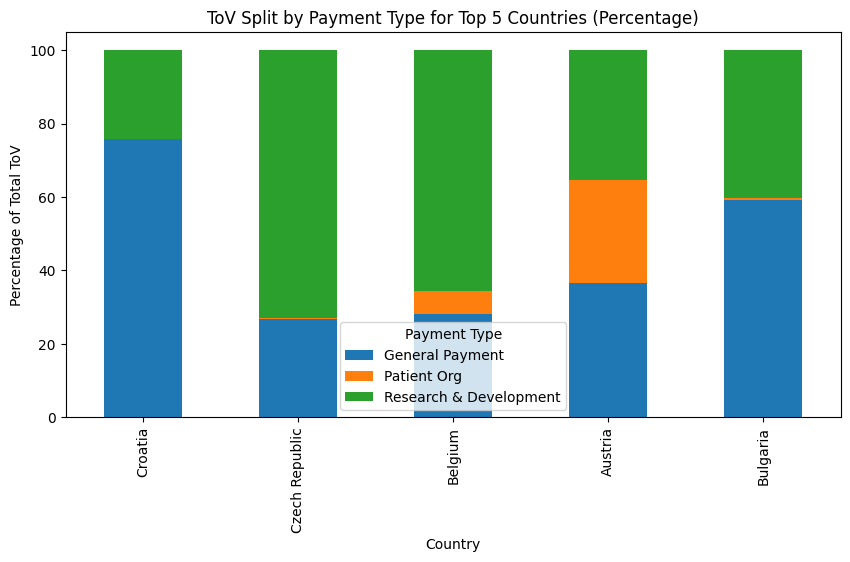

In [60]:
# Calculate the total ToV by country and payment type
ToV_by_country_payment_type = Case_study_data[Case_study_data.YEAR == 2023].groupby(['Country', 'Payment Type'])['Spend_Amount(ToV) in USD'].sum()

# Create a pivot table
pivot_table = ToV_by_country_payment_type.unstack()

# Calculate percentage
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Sort the pivot table by total ToV in descending order
pivot_table_percentage = pivot_table_percentage.loc[ToV_by_country.sort_values(ascending=False).index[:5]]

# Create a column chart
pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel("Country")
plt.ylabel("Percentage of Total ToV")
plt.title("ToV Split by Payment Type for Top 5 Countries (Percentage)")
plt.show()